
# Ensemble Learning of Autoencoders:



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install tensorflow

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


**Network Flow Group Autoencoder:**

In [5]:

network_flow_df = pd.read_csv('/content/drive/MyDrive/network_flow_features.csv', header=0)

# Convert the DataFrame to a NumPy array, retaining rows with "ff:ff:ff:ff:ff:ff"
network_flow_data = network_flow_df.values
#print(network_flow_data)


# Display unique values in each column
for column in network_flow_df.columns:
    unique_values = network_flow_df[column].unique()
    #print(f"Column: {column}, Unique Values: {unique_values}")
#print(network_flow_df.columns)
print(network_flow_df.isnull().sum())


src_ip                0
dst_ip                0
src_port             66
dst_port             66
packet_count          0
total_bytes           0
traffic_direction     0
first_timestamp       0
last_timestamp        0
dtype: int64


In [6]:
#data preprocessing:

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split


network_flow_df.dropna(subset=['src_port', 'dst_port'], inplace=True)

# Define columns to be transformed:
numerical_features = ['src_port', 'dst_port', 'packet_count', 'total_bytes']
categorical_features = ['src_ip', 'dst_ip', 'traffic_direction']

# Create transformers:
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', sparse_output=False)  # Set sparse_output to False to ensure a dense array

# Apply column transformer to appropriate columns:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fit and transform the data:
df_preprocessed_array = preprocessor.fit_transform(network_flow_df)

# Separately transform the data to get the right shapes:
df_numerical_transformed = preprocessor.transformers_[0][1].transform(network_flow_df[numerical_features])
df_categorical_transformed = preprocessor.transformers_[1][1].transform(network_flow_df[categorical_features])

# Ensure both are 2D arrays:
df_numerical_transformed = np.array(df_numerical_transformed)
df_categorical_transformed = np.array(df_categorical_transformed)

# Get the feature names for the transformed columns separately
numerical_names = numerical_features
categorical_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)

# Combine them to create a complete list of column names for the transformed dataframe
all_column_names = list(numerical_names) + list(categorical_names)

# Merge the transformed numerical and categorical data
transformed_data = np.hstack([df_numerical_transformed, df_categorical_transformed])

# Create a dataframe using the combined data and column names
df_preprocessed = pd.DataFrame(transformed_data, columns=all_column_names)

# Splitting the preprocessed data into 80% training and 20% testing
X_train, X_test_NF = train_test_split(df_preprocessed, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test_NF.shape}")

print(df_preprocessed)


Training data shape: (157842, 197)
Testing data shape: (39461, 197)
        src_port  dst_port  packet_count  total_bytes  src_ip_108.59.2.24  \
0       1.392846 -0.873903      0.133698     0.032115                 0.0   
1      -0.875627  1.396184      0.024445     0.147736                 0.0   
2      -0.872958 -0.871232     -0.084809    -0.109405                 0.0   
3      -0.872958 -0.871232     -0.084809    -0.109405                 0.0   
4      -0.673568 -0.671700     20.946493    24.443007                 0.0   
...          ...       ...           ...          ...                 ...   
197298 -0.875627  1.084067     -0.084809    -0.106630                 0.0   
197299  0.671000 -0.873903     -0.084809    -0.122355                 0.0   
197300 -0.875627  0.673825     -0.084809    -0.092756                 0.0   
197301 -0.062817 -0.873903     -0.084809    -0.122355                 0.0   
197302 -0.875627 -0.060514     -0.084809    -0.092756                 0.0   

       

In [7]:
# define Autoencoder
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense



# Dimensions of the preprocessed data
input_dim = df_preprocessed.shape[1]

# Define the autoencoder architecture
input_layer = Input(shape=(input_dim,))
encoded = Dense(32, activation='relu')(input_layer)
encoded = Dense(16, activation='relu')(encoded)
decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder_NF = Model(input_layer, decoded)
autoencoder_NF.compile(optimizer='adam', loss='mean_squared_error')

In [8]:
# Train autoencoder:
# Normalize the data to be between 0 and 1 (important for the 'sigmoid' activation function)
df_preprocessed_norm = np.clip(df_preprocessed, 0, 1)

# Train the autoencoder
autoencoder_NF.fit(df_preprocessed_norm, df_preprocessed_norm, epochs=50, batch_size=256, shuffle=True)

Epoch 1/50
771/771 [==============================] - 8s 3ms/step - loss: 0.0208
Epoch 2/50
771/771 [==============================] - 2s 3ms/step - loss: 0.0031
Epoch 3/50
771/771 [==============================] - 2s 3ms/step - loss: 6.9205e-04
Epoch 4/50
771/771 [==============================] - 2s 3ms/step - loss: 4.5428e-04
Epoch 5/50
771/771 [==============================] - 2s 3ms/step - loss: 3.7970e-04
Epoch 6/50
771/771 [==============================] - 2s 3ms/step - loss: 3.7456e-04
Epoch 7/50
771/771 [==============================] - 2s 3ms/step - loss: 3.5499e-04
Epoch 8/50
771/771 [==============================] - 2s 3ms/step - loss: 3.3784e-04
Epoch 9/50
771/771 [==============================] - 2s 3ms/step - loss: 3.3416e-04
Epoch 10/50
771/771 [==============================] - 2s 3ms/step - loss: 3.3184e-04
Epoch 11/50
771/771 [==============================] - 2s 3ms/step - loss: 3.2944e-04
Epoch 12/50
771/771 [==============================] - 2s 3ms/step - lo

*Evaluation for Networkflow AUE:*

In [9]:
#Reconstruction Error: (A lower MSE indicates better reconstruction)

reconstruction_error = autoencoder_NF.evaluate(df_preprocessed_norm, df_preprocessed_norm)
print(f"Reconstruction error: {reconstruction_error}")

mse_NF = autoencoder_NF.evaluate(df_preprocessed_norm, df_preprocessed_norm)
print(f"Mean Squared Error: {mse_NF}")

6166/6166 [==============================] - 10s 2ms/step - loss: 2.1742e-04
Reconstruction error: 0.000217421431443654
6166/6166 [==============================] - 10s 2ms/step - loss: 2.1742e-04
Mean Squared Error: 0.000217421431443654


**Network Traffic Group Autoencoder:**

In [10]:
network_traffic_df = pd.read_csv('/content/drive/MyDrive/network_traffic_features.csv')

# Convert the DataFrame to a NumPy array, retaining rows with "ff:ff:ff:ff:ff:ff"
network_traffic_data = network_traffic_df.values

print(network_traffic_data)


# Display unique values in each column
for column in network_traffic_df.columns:
    unique_values = network_traffic_df[column].unique()
    print(f"Column: {column}, Unique Values: {unique_values}")

[[nan nan nan ... nan nan 1499342338.492265]
 [nan nan nan ... nan nan 1499342342.261854]
 [nan nan nan ... nan nan 1499342342.963151]
 ...
 ['b8:ac:6f:36:0b:a8' '33:33:00:00:00:16' nan ... nan nan
  1499371484.363801]
 ['b8:ac:6f:36:0b:a8' '33:33:00:00:00:16' nan ... nan nan
  1499371484.363906]
 ['b8:ac:6f:36:0b:a8' '33:33:00:00:00:16' nan ... nan nan
  1499371484.364012]]
Column: eth_src, Unique Values: [nan '00:19:b9:0a:69:f1' '18:66:da:9b:e3:7d' 'b8:ac:6f:36:07:ee'
 '00:c1:b1:14:eb:31' '00:23:ae:9b:ad:b3' '00:1e:4f:d4:ca:28'
 'b8:ac:6f:36:04:e3' 'b8:ac:6f:36:08:f5' 'b8:ac:6f:36:0a:8b'
 'b8:ac:6f:1d:1f:6c' '00:23:ae:9b:95:67' '00:25:00:a8:c4:60'
 'b8:ac:6f:36:0b:a8' '00:23:ae:9b:8a:bf' '24:6e:96:4a:37:7a']
Column: eth_dst, Unique Values: [nan '18:66:da:9b:e3:7d' '00:19:b9:0a:69:f1' 'b8:ac:6f:36:07:ee'
 '00:c1:b1:14:eb:31' '01:00:5e:00:00:fb' '33:33:ff:9b:ad:b3'
 '33:33:00:00:00:16' '33:33:00:00:00:02' '33:33:00:00:00:fb'
 'ff:ff:ff:ff:ff:ff' '00:23:ae:9b:ad:b3' '33:33:ff:f6:bd:7b'


In [11]:
preprocessed_df = network_traffic_df.copy()

preprocessed_df['src_ip'].fillna(preprocessed_df['src_ip'].mode()[0], inplace=True)
preprocessed_df['dst_ip'].fillna(preprocessed_df['dst_ip'].mode()[0], inplace=True)
preprocessed_df['src_port'].fillna(preprocessed_df['src_port'].mean(), inplace=True)
preprocessed_df['dst_port'].fillna(preprocessed_df['dst_port'].mean(), inplace=True)
preprocessed_df['protocol'].fillna(preprocessed_df['protocol'].mode()[0], inplace=True)

preprocessed_df = pd.get_dummies(preprocessed_df, columns=['protocol'])

scaler = MinMaxScaler()
numeric_cols = ['src_port', 'dst_port', 'timestamp']
preprocessed_df[numeric_cols] = scaler.fit_transform(preprocessed_df[numeric_cols])

print(preprocessed_df)

                  eth_src            eth_dst        src_ip        dst_ip  \
0                     NaN                NaN  192.168.10.3  192.168.10.3   
1                     NaN                NaN  192.168.10.3  192.168.10.3   
2                     NaN                NaN  192.168.10.3  192.168.10.3   
3       00:19:b9:0a:69:f1  18:66:da:9b:e3:7d  192.168.10.3  192.168.10.3   
4       00:19:b9:0a:69:f1  18:66:da:9b:e3:7d  192.168.10.3  192.168.10.3   
...                   ...                ...           ...           ...   
783872  b8:ac:6f:36:0b:a8  33:33:00:00:00:16  192.168.10.3  192.168.10.3   
783873  b8:ac:6f:36:0b:a8  33:33:00:00:00:16  192.168.10.3  192.168.10.3   
783874  b8:ac:6f:36:0b:a8  33:33:00:00:00:16  192.168.10.3  192.168.10.3   
783875  b8:ac:6f:36:0b:a8  33:33:00:00:00:16  192.168.10.3  192.168.10.3   
783876  b8:ac:6f:36:0b:a8  33:33:00:00:00:16  192.168.10.3  192.168.10.3   

        src_port  dst_port  timestamp  protocol_1  protocol_17  protocol_2  \
0       0

In [12]:
# 1. Label encode the columns containing MAC addresses (eth_src and eth_dst) into numeric values:
le = LabelEncoder()
preprocessed_df['eth_src'] = le.fit_transform(preprocessed_df['eth_src'])
preprocessed_df['eth_dst'] = le.fit_transform(preprocessed_df['eth_dst'])

# 2. Convert the necessary columns to float32
numeric_cols = ['src_port', 'dst_port', 'timestamp']
preprocessed_df[numeric_cols] = preprocessed_df[numeric_cols].astype('float32')

# 3. Normalize the numeric columns using Min-Max scaling.
scaler = MinMaxScaler()
preprocessed_df[numeric_cols] = scaler.fit_transform(preprocessed_df[numeric_cols])

In [13]:
# Check the data types of each column
column_types = preprocessed_df.dtypes

# Print out the data types of all columns
print(column_types)

# List columns that are of string (object) type
string_columns = column_types[column_types == 'object'].index.tolist()

print("\nColumns with string (object) data type:")
print(string_columns)

eth_src           int64
eth_dst           int64
src_ip           object
dst_ip           object
src_port        float32
dst_port        float32
timestamp       float32
protocol_1        uint8
protocol_17       uint8
protocol_2        uint8
protocol_UDP      uint8
dtype: object

Columns with string (object) data type:
['src_ip', 'dst_ip']


In [14]:
from sklearn.model_selection import train_test_split

# Define a function to process IP columns
def process_ip_column(df, ip_col):
    # Split the IP address into its components
    df[[ip_col + '_part1', ip_col + '_part2', ip_col + '_part3', ip_col + '_part4']] = df[ip_col].str.split('.', expand=True)

    # Convert these components to numeric type
    for part in ['_part1', '_part2', '_part3', '_part4']:
        df[ip_col + part] = pd.to_numeric(df[ip_col + part])

    # Drop the original IP column
    df = df.drop(columns=[ip_col])

    return df

# Process each IP column
preprocessed_df = process_ip_column(preprocessed_df, 'src_ip')
preprocessed_df = process_ip_column(preprocessed_df, 'dst_ip')

# Now convert the entire DataFrame to float32 type
preprocessed_df = preprocessed_df.astype('float32')

# Splitting the preprocessed data into 80% training and 20% testing
X_train, X_test_NT = train_test_split(preprocessed_df, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test_NT.shape}")


Training data shape: (627101, 17)
Testing data shape: (156776, 17)


In [15]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# Define the dimensions of the encoding layer
encoding_dim = 64  # Example: Reducing to 64 dimensions

# Create an autoencoder model
input_shape = X_train.shape[1]  # Use the shape of the training data
input_layer = Input(shape=(input_shape,))

# Encoding layers
encoded = Dense(128, activation='relu')(input_layer)
encoded = Dense(encoding_dim, activation='relu')(encoded)

# Decoding layers
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(input_shape, activation='linear')(decoded)  # Change to linear activation

# Full autoencoder model from input to reconstructed output
autoencoder_NT = Model(input_layer, decoded)

# Separate encoder model for obtaining the compressed representation
encoder = Model(input_layer, encoded)

# Compile the autoencoder model with adjusted learning rate
opt = Adam(learning_rate=0.001)  # Adjust the learning rate if necessary
autoencoder_NT.compile(optimizer=opt, loss='mean_squared_error')

# Define early stopping callback to monitor validation loss
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the autoencoder
num_epochs = 100
batch_size = 32
autoencoder_NT.fit(X_train, X_train,
                epochs=num_epochs,
                batch_size=batch_size,
                validation_data=(X_test_NT, X_test_NT),
                callbacks=[early_stopping])


Epoch 1/100
19597/19597 [==============================] - 59s 3ms/step - loss: 6.8161 - val_loss: 0.1497
Epoch 2/100
19597/19597 [==============================] - 55s 3ms/step - loss: 0.2621 - val_loss: 0.1287
Epoch 3/100
19597/19597 [==============================] - 56s 3ms/step - loss: 0.2008 - val_loss: 0.2395
Epoch 4/100
19597/19597 [==============================] - 56s 3ms/step - loss: 0.1755 - val_loss: 0.0829
Epoch 5/100
19597/19597 [==============================] - 56s 3ms/step - loss: 0.1599 - val_loss: 0.0919
Epoch 6/100
19597/19597 [==============================] - 56s 3ms/step - loss: 0.1401 - val_loss: 0.2225
Epoch 7/100
19597/19597 [==============================] - 55s 3ms/step - loss: 0.1330 - val_loss: 0.0279
Epoch 8/100
19597/19597 [==============================] - 55s 3ms/step - loss: 0.1251 - val_loss: 0.4077
Epoch 9/100
19597/19597 [==============================] - 56s 3ms/step - loss: 0.1225 - val_loss: 0.0802
Epoch 10/100
19597/19597 [====================

*Evaluation for Network Traffic Autoencoder:*

In [16]:
#Reconstruction Error: (A lower MSE indicates better reconstruction)
reconstructed_data = autoencoder_NT.predict(X_test_NT)
mse_NT = np.mean(np.square(X_test_NT - reconstructed_data))
print(f"Mean Squared Error (MSE): {mse_NT}")

4900/4900 [==============================] - 6s 1ms/step
Mean Squared Error (MSE): eth_src         0.016816
eth_dst         0.044691
src_port        0.007283
dst_port        0.007720
timestamp       0.005169
protocol_1      0.013718
protocol_17     0.003336
protocol_2      0.003295
protocol_UDP    0.002705
src_ip_part1    0.049637
src_ip_part2    0.041726
src_ip_part3    0.028387
src_ip_part4    0.046063
dst_ip_part1    0.039330
dst_ip_part2    0.074754
dst_ip_part3    0.044566
dst_ip_part4    0.045798
dtype: float32


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [17]:
#Anomaly Detection:


reconstructed_data = autoencoder_NT.predict(X_test_NT)
mse = np.mean(np.square(X_test_NT - reconstructed_data), axis=1)

# Set a threshold for anomaly detection
threshold = 0.1

# Identify anomalies
anomalies = X_test_NT[mse > threshold]

print(f"Number of anomalies: {anomalies.shape[0]}")

4900/4900 [==============================] - 6s 1ms/step
Number of anomalies: 8468


**Pyload Charactristics Group Autoencoder:**

In [18]:
payload_characteristics_df = pd.read_csv('/content/drive/MyDrive/payload_characteristics_features.csv')

# Convert the DataFrame to a NumPy array, retaining rows with "ff:ff:ff:ff:ff:ff"
payload_characteristics_data = payload_characteristics_df.values

print(payload_characteristics_data)


# Display unique values in each column
for column in payload_characteristics_df.columns:
    unique_values = payload_characteristics_df[column].unique()
    print(f"Column: {column}, Unique Values: {unique_values}")

payload_characteristics_df.info(memory_usage='deep')

[['2017-07-06 11:58:58' nan nan nan nan]
 ['2017-07-06 11:59:02' nan nan nan nan]
 ['2017-07-06 11:59:02' nan nan nan nan]
 ...
 ['2017-07-06 20:04:44' 'b8:ac:6f:36:0b:a8' '33:33:00:00:00:16' nan nan]
 ['2017-07-06 20:04:44' 'b8:ac:6f:36:0b:a8' '33:33:00:00:00:16' nan nan]
 ['2017-07-06 20:04:44' 'b8:ac:6f:36:0b:a8' '33:33:00:00:00:16' nan nan]]
Column: timestamp, Unique Values: ['2017-07-06 11:58:58' '2017-07-06 11:59:02' '2017-07-06 11:59:05' ...
 '2017-07-06 20:04:35' '2017-07-06 20:04:36' '2017-07-06 20:04:44']
Column: eth_src, Unique Values: [nan '00:19:b9:0a:69:f1' '18:66:da:9b:e3:7d' 'b8:ac:6f:36:07:ee'
 '00:c1:b1:14:eb:31' '00:23:ae:9b:ad:b3' '00:1e:4f:d4:ca:28'
 'b8:ac:6f:36:04:e3' 'b8:ac:6f:36:08:f5' 'b8:ac:6f:36:0a:8b'
 'b8:ac:6f:1d:1f:6c' '00:23:ae:9b:95:67' '00:25:00:a8:c4:60'
 'b8:ac:6f:36:0b:a8' '00:23:ae:9b:8a:bf' '24:6e:96:4a:37:7a']
Column: eth_dst, Unique Values: [nan '18:66:da:9b:e3:7d' '00:19:b9:0a:69:f1' 'b8:ac:6f:36:07:ee'
 '00:c1:b1:14:eb:31' '01:00:5e:00:00:fb'

In [19]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer

data = payload_characteristics_df.copy()

# Handling Missing Data
imputer = SimpleImputer(strategy='constant', fill_value='UNKNOWN')
data_filled = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Label Encoding
label_encoders = {}  # store label encoders for potential inverse transform later

for column in data_filled.columns:
    le = LabelEncoder()
    data_filled[column] = le.fit_transform(data_filled[column])
    label_encoders[column] = le

# Feature Scaling
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_filled)
scaled_df = pd.DataFrame(scaled_data, columns=data_filled.columns)

print(scaled_df)




        timestamp  eth_src   eth_dst  src_ip  dst_ip
0        0.000000      0.6  0.805556     1.0     1.0
1        0.000049      0.6  0.805556     1.0     1.0
2        0.000049      0.6  0.805556     1.0     1.0
3        0.000097      0.0  0.388889     1.0     1.0
4        0.000097      0.0  0.388889     1.0     1.0
...           ...      ...       ...     ...     ...
783872   1.000000      1.0  0.500000     1.0     1.0
783873   1.000000      1.0  0.500000     1.0     1.0
783874   1.000000      1.0  0.500000     1.0     1.0
783875   1.000000      1.0  0.500000     1.0     1.0
783876   1.000000      1.0  0.500000     1.0     1.0

[783877 rows x 5 columns]


In [20]:
# Assuming scaled_df is your preprocessed dataframe
data = scaled_df.values

# Split the data into training and test sets
X_train, X_test_PCH = train_test_split(data, test_size=0.2, random_state=42)

# Autoencoder architecture
input_dim = X_train.shape[1]  # Number of features/columns
encoding_dim = int(input_dim / 2)  # Arbitrary reduction factor, you can adjust this

# Define the encoder
input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)

# Define the decoder
decoder = Dense(input_dim, activation='sigmoid')(encoder)

# Compile the autoencoder model
autoencoder_PCH = Model(inputs=input_layer, outputs=decoder)
autoencoder_PCH.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
history = autoencoder_PCH.fit(
    X_train, X_train,
    epochs=50,
    batch_size=256,
    shuffle=True,
    validation_data=(X_test_PCH, X_test_PCH)
)

# Now you can use this autoencoder to predict/reconstruct the input data
X_test_predicted = autoencoder_PCH.predict(X_test_PCH)

# Measure the reconstruction error
reconstruction_error = np.mean(np.power(X_test_PCH - X_test_predicted, 2), axis=1)

print("Reconstruction error:", np.mean(reconstruction_error))

Epoch 1/50
2450/2450 [==============================] - 7s 2ms/step - loss: 0.0456 - val_loss: 0.0283
Epoch 2/50
2450/2450 [==============================] - 6s 2ms/step - loss: 0.0236 - val_loss: 0.0215
Epoch 3/50
2450/2450 [==============================] - 6s 2ms/step - loss: 0.0208 - val_loss: 0.0209
Epoch 4/50
2450/2450 [==============================] - 6s 2ms/step - loss: 0.0206 - val_loss: 0.0208
Epoch 5/50
2450/2450 [==============================] - 6s 2ms/step - loss: 0.0206 - val_loss: 0.0207
Epoch 6/50
2450/2450 [==============================] - 6s 2ms/step - loss: 0.0205 - val_loss: 0.0205
Epoch 7/50
2450/2450 [==============================] - 6s 2ms/step - loss: 0.0202 - val_loss: 0.0203
Epoch 8/50
2450/2450 [==============================] - 6s 2ms/step - loss: 0.0200 - val_loss: 0.0201
Epoch 9/50
2450/2450 [==============================] - 6s 2ms/step - loss: 0.0199 - val_loss: 0.0200
Epoch 10/50
2450/2450 [==============================] - 6s 2ms/step - loss: 0.019

*Evaluation for Payload Charactristic Autoencoder:*

In [21]:
#Reconstruction Error: (A lower MSE indicates better reconstruction)

# Assuming you have trained autoencoder and a test dataset X_test
reconstructed_data = autoencoder_PCH.predict(X_test_PCH)
mse_PCH = np.mean(np.square(X_test_PCH - reconstructed_data))
print(f"Mean Squared Error (MSE): {mse_PCH}")

4900/4900 [==============================] - 6s 1ms/step
Mean Squared Error (MSE): 0.019524613944291287


In [22]:
#Anomaly Detection:

# Assuming you have trained autoencoder, a test dataset X_test, and a threshold value
reconstructed_data = autoencoder_PCH.predict(X_test_PCH)
mse_PCH = np.mean(np.square(X_test_PCH - reconstructed_data), axis=1)

# Set a threshold for anomaly detection
threshold = 0.1

# Identify anomalies
anomalies = X_test_PCH[mse_PCH > threshold]

print(f"Number of anomalies: {anomalies.shape[0]}")

4900/4900 [==============================] - 6s 1ms/step
Number of anomalies: 5651


**Protocol Specific Group Autoencoder:**

In [23]:
protocol_specific_df = pd.read_csv('/content/drive/MyDrive/protocol_specific_features.csv')

# Convert the DataFrame to a NumPy array, retaining rows with "ff:ff:ff:ff:ff:ff"
protocol_specific_data = protocol_specific_df.values

print(protocol_specific_data)


# Display unique values in each column
for column in protocol_specific_df.columns:
    unique_values = protocol_specific_df[column].unique()
    print(f"Column: {column}, Unique Values: {unique_values}")

[['2017-07-06 11:58:58' nan nan nan nan]
 ['2017-07-06 11:59:02' nan nan nan nan]
 ['2017-07-06 11:59:02' nan nan nan nan]
 ...
 ['2017-07-06 20:04:44' 'b8:ac:6f:36:0b:a8' '33:33:00:00:00:16' nan nan]
 ['2017-07-06 20:04:44' 'b8:ac:6f:36:0b:a8' '33:33:00:00:00:16' nan nan]
 ['2017-07-06 20:04:44' 'b8:ac:6f:36:0b:a8' '33:33:00:00:00:16' nan nan]]
Column: timestamp, Unique Values: ['2017-07-06 11:58:58' '2017-07-06 11:59:02' '2017-07-06 11:59:05' ...
 '2017-07-06 20:04:35' '2017-07-06 20:04:36' '2017-07-06 20:04:44']
Column: eth_src, Unique Values: [nan '00:19:b9:0a:69:f1' '18:66:da:9b:e3:7d' 'b8:ac:6f:36:07:ee'
 '00:c1:b1:14:eb:31' '00:23:ae:9b:ad:b3' '00:1e:4f:d4:ca:28'
 'b8:ac:6f:36:04:e3' 'b8:ac:6f:36:08:f5' 'b8:ac:6f:36:0a:8b'
 'b8:ac:6f:1d:1f:6c' '00:23:ae:9b:95:67' '00:25:00:a8:c4:60'
 'b8:ac:6f:36:0b:a8' '00:23:ae:9b:8a:bf' '24:6e:96:4a:37:7a']
Column: eth_dst, Unique Values: [nan '18:66:da:9b:e3:7d' '00:19:b9:0a:69:f1' 'b8:ac:6f:36:07:ee'
 '00:c1:b1:14:eb:31' '01:00:5e:00:00:fb'

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

preprocessed_df = protocol_specific_df.copy()

# Fill NaN values with a placeholder (e.g., 'missing' for categorical data)
preprocessed_df = preprocessed_df.fillna('missing')

# Columns to be label encoded
categorical_cols = preprocessed_df.columns.tolist()

# Create a function to apply label encoding to all columns
def label_encode(df):
    for col in df.columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
    return df

# Apply Label Encoding
preprocessed_df = label_encode(preprocessed_df)

# Create a pipeline
pipeline = Pipeline([
    ('scaler', MinMaxScaler())
])

# Apply transformations
data_processed = pipeline.fit_transform(preprocessed_df)

# Split the data into training and validation sets
X_train, X_test_PS = train_test_split(data_processed, test_size=0.2, random_state=42)

print(X_train)
print(X_test_PS)


[[0.09653393 0.46666667 0.02777778 0.42391304 0.36      ]
 [0.07628274 0.2        0.38888889 0.39130435 0.408     ]
 [0.02891637 0.46666667 0.91666667 0.42391304 0.416     ]
 ...
 [0.14341349 0.86666667 0.38888889 0.43478261 0.408     ]
 [0.84821342 0.46666667 0.11111111 0.42391304 0.384     ]
 [0.13357998 0.46666667 0.80555556 1.         1.        ]]
[[0.62501217 0.2        0.38888889 0.39130435 0.408     ]
 [0.57900886 0.46666667 0.16666667 0.42391304 0.336     ]
 [0.1138156  0.13333333 0.16666667 1.         1.        ]
 ...
 [0.00272612 0.66666667 0.5        1.         1.        ]
 [0.36802648 0.46666667 0.16666667 0.42391304 0.336     ]
 [0.80376789 0.46666667 0.83333333 1.         1.        ]]


In [25]:
#Define and build the autoencoder:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense


input_dim = X_train.shape[1]

# Define the encoder layers
input_layer = Input(shape=(input_dim,))
encoder = Dense(512, activation='relu')(input_layer)
encoder = Dense(256, activation='relu')(encoder)
encoder = Dense(128, activation='relu')(encoder)

# Define the bottleneck (compressed representation)
bottleneck = Dense(64, activation='relu')(encoder)

# Define the decoder layers
decoder = Dense(128, activation='relu')(bottleneck)
decoder = Dense(256, activation='relu')(decoder)
decoder = Dense(512, activation='relu')(decoder)
output_layer = Dense(input_dim, activation='sigmoid')(decoder)

# Compile the autoencoder
autoencoder_PS = Model(inputs=input_layer, outputs=output_layer)
autoencoder_PS.compile(optimizer='adam', loss='binary_crossentropy')


In [26]:
#Train the autoencoder:
history = autoencoder_PS.fit(X_train, X_train,
                             epochs=50,
                             batch_size=256,
                             shuffle=True,
                             validation_data=(X_test_PS, X_test_PS))



Epoch 1/50
2450/2450 [==============================] - 13s 4ms/step - loss: 0.5530 - val_loss: 0.5510
Epoch 2/50
2450/2450 [==============================] - 10s 4ms/step - loss: 0.5514 - val_loss: 0.5508
Epoch 3/50
2450/2450 [==============================] - 10s 4ms/step - loss: 0.5513 - val_loss: 0.5508
Epoch 4/50
2450/2450 [==============================] - 10s 4ms/step - loss: 0.5513 - val_loss: 0.5510
Epoch 5/50
2450/2450 [==============================] - 10s 4ms/step - loss: 0.5513 - val_loss: 0.5507
Epoch 6/50
2450/2450 [==============================] - 10s 4ms/step - loss: 0.5513 - val_loss: 0.5507
Epoch 7/50
2450/2450 [==============================] - 10s 4ms/step - loss: 0.5513 - val_loss: 0.5507
Epoch 8/50
2450/2450 [==============================] - 10s 4ms/step - loss: 0.5513 - val_loss: 0.5507
Epoch 9/50
2450/2450 [==============================] - 10s 4ms/step - loss: 0.5513 - val_loss: 0.5507
Epoch 10/50
2450/2450 [==============================] - 10s 4ms/step - l

*Evaluation for Protocol Specific Group Autoencoder:*

In [27]:
#Reconstruction Error: (A lower MSE indicates better reconstruction)

reconstruction_error = autoencoder_PS.evaluate(data_processed, data_processed)
print(f"Reconstruction error: {reconstruction_error}")

mse_PS = autoencoder_PS.evaluate(data_processed, data_processed)
print(f"Mean Squared Error: {mse_PS}")

24497/24497 [==============================] - 44s 2ms/step - loss: 0.5511
Reconstruction error: 0.5511430501937866
24497/24497 [==============================] - 44s 2ms/step - loss: 0.5511
Mean Squared Error: 0.5511430501937866


**Session Behaviour Group Autoencoder:**

In [28]:
session_behaviour_df = pd.read_csv('/content/drive/MyDrive/session_behaviour_features.csv')

# Convert the DataFrame to a NumPy array, retaining rows with "ff:ff:ff:ff:ff:ff"
session_behaviour_data = session_behaviour_df.values

print(session_behaviour_data)


# Display unique values in each column
for column in session_behaviour_df.columns:
    unique_values = session_behaviour_df[column].unique()
    print(f"Column: {column}, Unique Values: {unique_values}")

[[2.6900000e-04 1.0000000e+00 0.0000000e+00           nan]
 [3.0352000e-02 1.0000000e+00 0.0000000e+00 3.3566580e+01]
 [1.7000000e-05 1.0000000e+00 0.0000000e+00 3.9430723e+01]
 ...
 [1.9000000e-05 1.0000000e+00 0.0000000e+00 1.2698560e+00]
 [1.6000000e-05 1.0000000e+00 0.0000000e+00 1.3200000e-04]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 6.0000000e-06]]
Column: session_duration, Unique Values: [2.69000e-04 3.03520e-02 1.70000e-05 ... 5.91100e-03 4.90911e-01
 2.39370e-02]
Column: auth_event_count, Unique Values: [1]
Column: failed_login_count, Unique Values: [0]
Column: auth_attempt_interval, Unique Values: [          nan 3.3566580e+01 3.9430723e+01 ... 3.3464700e-01 1.2698560e+00
 6.0000000e-06]


In [29]:
#preprocess data:

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Convert datetime column to Unix timestamp
if 'session_start_timestamp' in session_behaviour_df.columns:
    session_behaviour_df['session_start_timestamp'] = pd.to_datetime(session_behaviour_df['session_start_timestamp'])
    session_behaviour_df['unix_timestamp'] = session_behaviour_df['session_start_timestamp'].astype(int) / 10**9
    session_behaviour_df.drop('session_start_timestamp', axis=1, inplace=True)

# Handle Missing Values
# For the column 'auth_attempt_interval', replace NaN values with the median
session_behaviour_df['auth_attempt_interval'].fillna(session_behaviour_df['auth_attempt_interval'].median(), inplace=True)

# Check for non-numeric columns
non_numeric_columns = session_behaviour_df.select_dtypes(exclude=[np.number]).columns
print(f"Non-numeric columns: {non_numeric_columns}")

# If the printout above shows any non-numeric columns, consider converting or dropping them before scaling.

# Scale the Data
# Initialize a scaler
scaler = MinMaxScaler()

# Fit the scaler to the data and transform the data
scaled_data = scaler.fit_transform(session_behaviour_df)

# Convert the scaled data back to a DataFrame (optional, but can be useful for further operations)
scaled_df = pd.DataFrame(scaled_data, columns=session_behaviour_df.columns)

# Split the data for training
X_train, X_test_SB = train_test_split(scaled_df, test_size=0.2, random_state=42)




Non-numeric columns: Index([], dtype='object')


In [30]:
#Autoencoder:

# Define the dimensions of the encoding layer
encoding_dim = 64  # Example: Reducing to 64 dimensions

# Create an autoencoder model
input_shape = X_train.shape[1]  # Number of features in the dataset
input_layer = Input(shape=(input_shape,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_shape, activation='sigmoid')(encoded)

autoencoder_SB = Model(input_layer, decoded)



# Compile the autoencoder model
autoencoder_SB.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
num_epochs = 100
batch_size = 32

autoencoder_SB.fit(X_train, X_train,
                epochs=num_epochs,
                batch_size=batch_size,
                validation_data=(X_test_SB, X_test_SB))


Epoch 1/100
264/264 [==============================] - 1s 3ms/step - loss: 0.0834 - val_loss: 0.0091
Epoch 2/100
264/264 [==============================] - 1s 2ms/step - loss: 0.0059 - val_loss: 0.0042
Epoch 3/100
264/264 [==============================] - 1s 2ms/step - loss: 0.0036 - val_loss: 0.0025
Epoch 4/100
264/264 [==============================] - 1s 2ms/step - loss: 0.0018 - val_loss: 0.0013
Epoch 5/100
264/264 [==============================] - 1s 3ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 6/100
264/264 [==============================] - 1s 2ms/step - loss: 0.0011 - val_loss: 9.7608e-04
Epoch 7/100
264/264 [==============================] - 1s 3ms/step - loss: 9.2669e-04 - val_loss: 7.6109e-04
Epoch 8/100
264/264 [==============================] - 1s 2ms/step - loss: 6.6805e-04 - val_loss: 5.7975e-04
Epoch 9/100
264/264 [==============================] - 1s 2ms/step - loss: 5.3842e-04 - val_loss: 5.0932e-04
Epoch 10/100
264/264 [==============================] - 1s 3ms/

*Evaluate for Session Behaviour Group Autoencoder:*

In [31]:
#Reconstruction Error: (A lower MSE indicates better reconstruction)

# Assuming you have trained autoencoder and a test dataset X_test
reconstructed_data = autoencoder_SB.predict(X_test_SB)
mse_SB = np.mean(np.square(X_test_SB - reconstructed_data))
print(f"Mean Squared Error (MSE): {mse_SB}")

66/66 [==============================] - 0s 1ms/step
Mean Squared Error (MSE): session_duration         2.314845e-05
auth_event_count         3.265984e-09
failed_login_count       3.357548e-09
auth_attempt_interval    3.026643e-06
dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


#  Ensemble Learning:

In [32]:
print(X_test_NF.shape)
print(X_test_NT.shape)
print(X_test_PCH.shape)
print(X_test_PS.shape)
print(X_test_SB.shape)
# ... and so on for the others


(39461, 197)
(156776, 17)
(156776, 5)
(156776, 5)
(2110, 4)


In [33]:
# 1. Compute Anomaly Scores
reconstructed_NF = autoencoder_NF.predict(X_test_NF)
errors_NF = np.mean(np.square(X_test_NF - reconstructed_NF), axis=1)

reconstructed_NT = autoencoder_NT.predict(X_test_NT)
errors_NT = np.mean(np.square(X_test_NT - reconstructed_NT), axis=1)

reconstructed_PCH = autoencoder_PCH.predict(X_test_PCH)
errors_PCH = np.mean(np.square(X_test_PCH - reconstructed_PCH), axis=1)

reconstructed_PS = autoencoder_PS.predict(X_test_PS)
errors_PS = np.mean(np.square(X_test_PS - reconstructed_PS), axis=1)

reconstructed_SB = autoencoder_SB.predict(X_test_SB)
errors_SB = np.mean(np.square(X_test_SB - reconstructed_SB), axis=1)




66/66 [==============================] - 0s 1ms/step


In [34]:
# Convert the error lists to numpy arrays (if they aren't already)
errors_NF = np.array(errors_NF)
errors_NT = np.array(errors_NT)
errors_PCH = np.array(errors_PCH)
errors_PS = np.array(errors_PS)
errors_SB = np.array(errors_SB)

# Determine the minimum length
min_length = min(len(errors_NF), len(errors_NT), len(errors_PCH), len(errors_PS), len(errors_SB))

# Trim each error array to the minimum length
errors_NF = errors_NF[:min_length]
errors_NT = errors_NT[:min_length]
errors_PCH = errors_PCH[:min_length]
errors_PS = errors_PS[:min_length]
errors_SB = errors_SB[:min_length]

# Ensure all errors are of the same shape
assert len(errors_NF) == len(errors_NT) == len(errors_PCH) == len(errors_PS) == len(errors_SB)


In [35]:
# 2. Ensemble Anomaly Scores
ensemble_errors = (errors_NF + errors_NT + errors_PCH + errors_PS + errors_SB) / 5


In [36]:
# 3. Determine Anomalies
ensemble_threshold = np.percentile(ensemble_errors, 95)  # for example, setting threshold at 95th percentile of ensemble error
anomalies = ensemble_errors > ensemble_threshold


# Evaluation

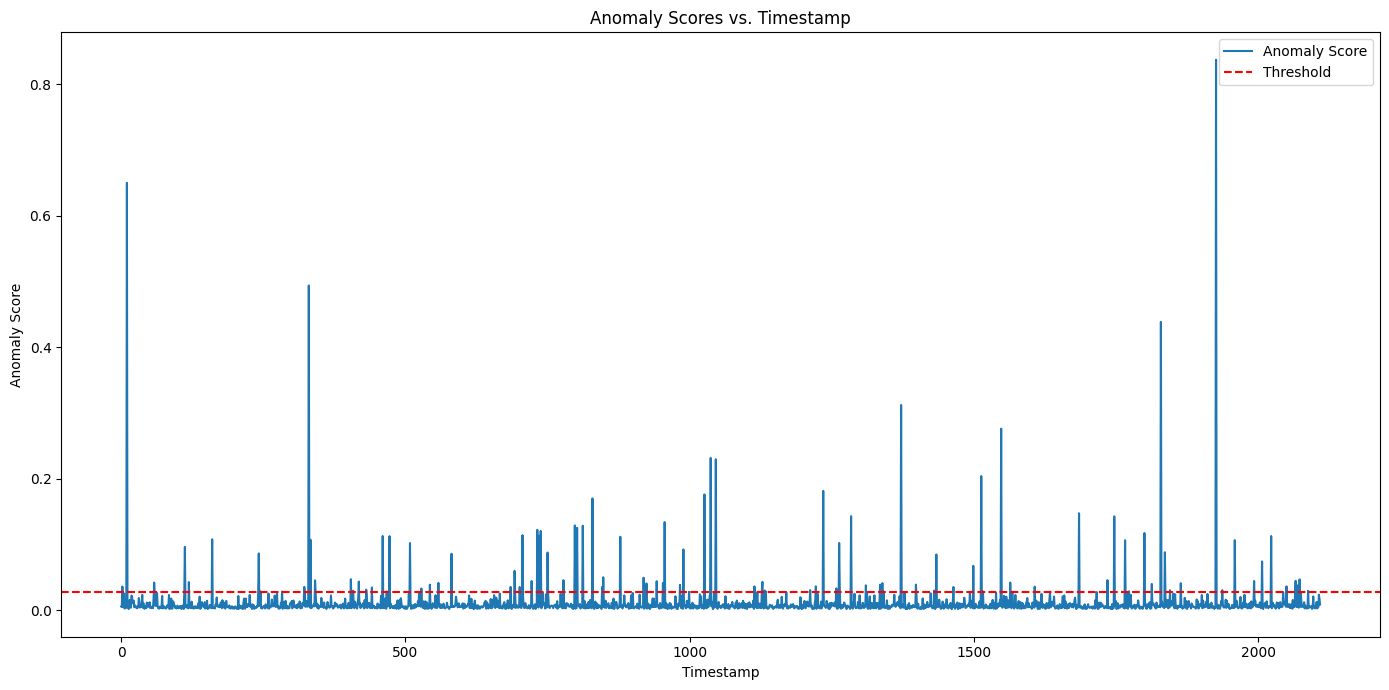

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have timestamps or some sequential data in a variable called `timestamps`
# This is just a placeholder; replace with your actual timestamp data
timestamps = range(len(ensemble_errors))

plt.figure(figsize=(14,7))
plt.plot(timestamps, ensemble_errors, label='Anomaly Score')
plt.axhline(y=ensemble_threshold, color='r', linestyle='--', label='Threshold')
plt.title('Anomaly Scores vs. Timestamp')
plt.xlabel('Timestamp')
plt.ylabel('Anomaly Score')
plt.legend()
plt.tight_layout()
plt.show()


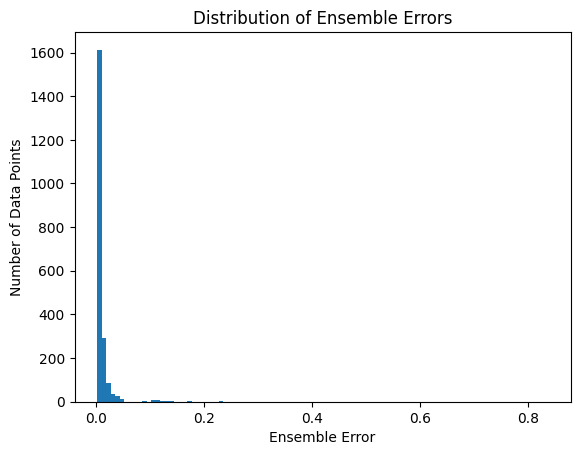

In [38]:
import matplotlib.pyplot as plt

plt.hist(ensemble_errors, bins=100)
plt.xlabel("Ensemble Error")
plt.ylabel("Number of Data Points")
plt.title("Distribution of Ensemble Errors")
plt.show()


In [39]:
mean_error = np.mean(ensemble_errors)
std_error = np.std(ensemble_errors)

# Using mean + 2*std as threshold, for instance
threshold = mean_error + 2*std_error
anomalies = ensemble_errors > threshold

print(f"Percentage of data points considered anomalies: {np.mean(anomalies) * 100:.2f}%")


Percentage of data points considered anomalies: 1.94%


Reconstruction & Loss Calculation:

In [40]:
# Ensemble Anomaly Scores
ensemble_errors = (errors_NF + errors_NT + errors_PCH + errors_PS + errors_SB) / 5
normal_test_loss = ensemble_errors


Plot Histogram of Loss on Normal Test Data

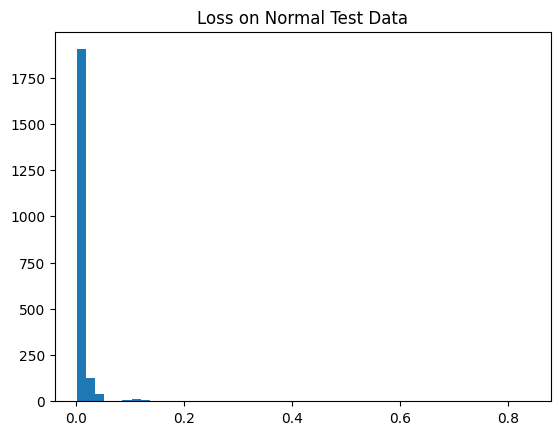

In [41]:
plt.hist(normal_test_loss, bins=50)
plt.title("Loss on Normal Test Data")
plt.show()


Calculate Threshold for Anomalies:

In [42]:
threshold = np.mean(normal_test_loss) + 2*np.std(normal_test_loss)


Compute Loss on Anomaly Test Data:

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


TypeError: ignored

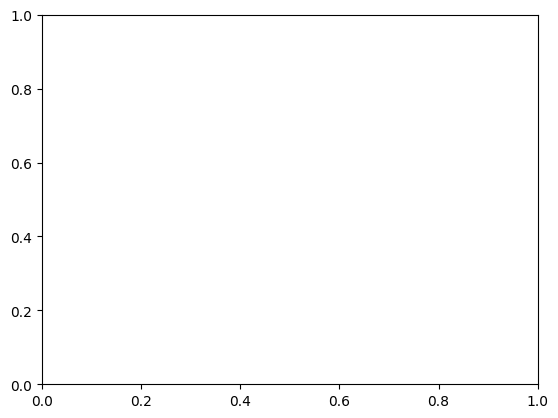

In [48]:
plt.hist(anomalies, bins=50)
plt.title("Loss on Anomaly Test Data")
plt.show()


Plot Both Losses Together with the Threshold

TypeError: ignored

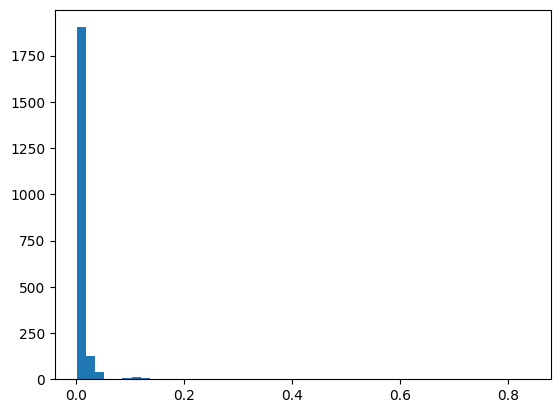

In [49]:
plt.hist(normal_test_loss, bins=50, label='normal')
plt.hist(anomalies, bins=50, label='anomaly')
plt.axvline(threshold, color='r', linewidth=3, linestyle='dashed', label='Threshold: {:0.3f}'.format(threshold))
plt.legend(loc='upper right')
plt.title("Normal and Anomaly Loss")
plt.show()


Evaluate Accuracy for Normal & Anomalous Data

In [50]:
# Normal data predictions
preds_normal = normal_test_loss < threshold
accuracy_normal = np.mean(preds_normal)

# Anomaly data predictions
preds_anomaly = anomalies > threshold
accuracy_anomaly = np.mean(preds_anomaly)

print(f"Accuracy on normal data: {accuracy_normal * 100:.2f}%")
print(f"Accuracy on anomaly data: {accuracy_anomaly * 100:.2f}%")


Accuracy on normal data: 98.06%
Accuracy on anomaly data: 1.94%
